Кобзарь О.С. Хабибуллин Р.А. 

# Расчет основных параметров многофазного потока

Для расчета свойств потока при определенных T и P предварительно необходимо пересчитать PVT свойства флюидов

Объемные дебиты нефти, воды, жидкости и газа:

$$q_o = q_{o_{н.у.}} B_o$$

$$q_w = q_{w_{н.у.}} B_w$$

$$q_g = (q_{g_{н.у.}} - q_{o_{н.у.}}R_{s}- q_{w_{н.у.}}R_{sw} ) B_g$$

$$q_L = q_o + q_w$$

Объемное содержание жидкости при отсутсвии проскальзывания:

$$\lambda_L = \frac{q_L}{q_L + q_g}$$

Уровень обводненности по дебитам фаз в условиях пласта:

$$f_w = \frac{q_w}{q_w + q_o}$$

$$f_o = 1- f_w$$

Поперечное сечение трубы:

$$A_p = \frac{\pi d^2}{4}$$

Приведенные скорости жидкости и газа:

$$v_{SL} = \frac{q_L}{A_p}$$

$$v_{Sg} = \frac{q_g}{A_p}$$

Общая скорость смеси:

$$v_{Sm} = \frac{q_L + q_g}{A_p} = v_{SL} + v_{Sg}$$

Свойства флюидов, выраженные аддитивно, без проскальзывания воды и нефти

$$\rho_L = \rho_o (1 - f_w) + \rho_w f_w$$

$$\sigma_L = \sigma_o (1 - f_w) + \sigma_w f_w$$

$$\mu_L = \mu_o (1 - f_w) + \mu_w f_w$$

Свойства газожидкостной смеси:

$$\mu_n = \mu_L \lambda_L + \mu_g ( 1 - \lambda_L)$$

$$\rho_s = \rho_L H_L + \rho_g ( 1 - H_L)$$

$$\rho_n = \rho_L \lambda_L + \rho_g ( 1 - \lambda_L)$$


In [1]:
import sys
sys.path.append('../')
import uniflocpy.uPVT.PVT_fluids as PVT
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pylab
import uniflocpy.uPVT.PVT_correlations as PVTcorr
%matplotlib inline

In [2]:
rsb_m3m3_example = 100
fluid_example = PVT.FluidStanding( rsb_m3m3= rsb_m3m3_example)
multiphase_flow_example = PVT.FluidFlow(fluid=fluid_example )

In [3]:
p_bar = 200
t_c = 50
multiphase_flow_example.calc(p_bar, t_c)

In [4]:
multiphase_flow_example.__dict__

{'fl': <uniflocpy.uPVT.PVT_fluids.FluidStanding at 0x2b9775efc88>,
 'qliq_on_surface_m3day': 100,
 'fw_on_surface_perc': 20,
 'd_m': 0.152,
 'qoil_on_surface_m3day': 80.0,
 'qwat_on_surface_m3day': 20.0,
 'qgas_on_surface_m3day': 8000.0,
 'Ap_m2': 0.018145839167134643,
 'qoil_m3day': 100.00141210995578,
 'qwat_m3day': 20.307956746902516,
 'qgas_m3day': 0.0,
 'qliq_m3day': 120.3093688568583,
 'vsl_msec': 0.07673767711313068,
 'vsg_msec': 0.0,
 'vsm_msec': 0.07673767711313068,
 'liquid_content': 1.0,
 'fw_perc': 16.879779970473056,
 'rho_liq_kgm3': 790.6702868516516,
 'sigma_liq_Nm': 0.011013127471092315,
 'mu_liq_cP': 0.5172172685963685,
 'mun_cP': 0.5172172685963685,
 'rhon_kgm3': 790.6702868516516}

In [5]:
#multiphase_flow_example.fl.__dict__

In [6]:
def show_example(legend, title, xlabel, ylabel):
    plt.grid(True)
    plt.title(title, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xlabel(xlabel, color='black')
    plt.legend(legend)
    plt.show()

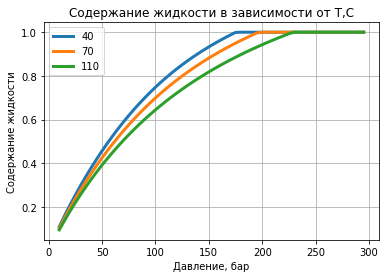

In [7]:
list_p_bar = np.arange(10,300,5)
list_t_c = [40,70,110]
liquid_content1, liquid_content2, liquid_content3 = [], [] , [] 

for i in list_p_bar:
    multiphase_flow_example.calc(i, list_t_c[0])
    liquid_content1.append(multiphase_flow_example.liquid_content)
    multiphase_flow_example.calc(i, list_t_c[1])
    liquid_content2.append(multiphase_flow_example.liquid_content)
    multiphase_flow_example.calc(i, list_t_c[2])
    liquid_content3.append(multiphase_flow_example.liquid_content) 

plt.plot(list_p_bar, liquid_content1, linewidth=3)
plt.plot(list_p_bar, liquid_content2, linewidth=3)
plt.plot(list_p_bar, liquid_content3, linewidth=3)

labels = (str(list_t_c[0]), str(list_t_c[1]), str(list_t_c[2]) )
show_example(labels,'Содержание жидкости в зависимости от Т,С', 
             'Давление, бар', 'Содержание жидкости' )

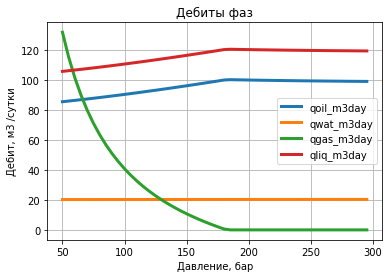

In [8]:
list_p_bar = np.arange(50,300,5)
list_t_c = np.arange(50,100,20)
qoil_m3day, qwat_m3day, qgas_m3day, qliq_m3day = [], [] , [] , []

for i in list_p_bar:
    multiphase_flow_example.calc(i, t_c)
    qoil_m3day.append(multiphase_flow_example.qoil_m3day)
    qwat_m3day.append(multiphase_flow_example.qwat_m3day)
    qgas_m3day.append(multiphase_flow_example.qgas_m3day) 
    qliq_m3day.append(multiphase_flow_example.qliq_m3day)

plt.plot(list_p_bar, qoil_m3day, linewidth=3)
plt.plot(list_p_bar, qwat_m3day, linewidth=3)
plt.plot(list_p_bar, qgas_m3day, linewidth=3)
plt.plot(list_p_bar, qliq_m3day, linewidth=3)
labels = ('qoil_m3day','qwat_m3day', 'qgas_m3day', 'qliq_m3day' )
show_example(labels,'Дебиты фаз', 
             'Давление, бар', 'Дебит, м3 /сутки' )